In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import os
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,5 # Set figure size

from trustworthiness import *
from util import *

### Compute and plot trustworthiness of **sidewalks**

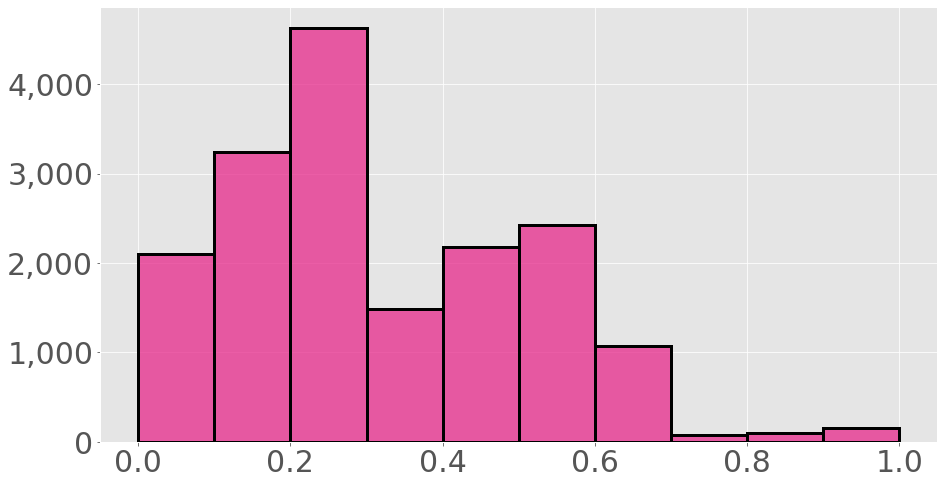

In [40]:
city = 'sea'
if city=='sea': col = '#e7298a'
if city=='chi': col = '#349C55'
if city=='nyc': col = '#FFB318'

if os.path.isfile('data/trust/trust_s_%s.csv'%(city)):
    trust_s = pd.read_csv('data/trust/trust_s_%s.csv'%(city))
else:
    trust_s = trustworthiness(sidewalk_qualifier, city)
    trust_s.to_csv('data/trust/trust_s_%s.csv'%(city), index=False)

plt.style.use('ggplot')
plt.figure(figsize=(15, 8))
plt.xticks(fontsize='30')
plt.yticks(fontsize='30') 

ax = sns.histplot(trust_s, x="Trust", color = col, bins = 10, edgecolor = 'black', linewidth=3)
ax.set(xlabel=None)
ax.set(ylabel=None)
# ax = plt.gca()
# ax.axes.xaxis.set_visible(False)
# ax.axes.yaxis.set_visible(False)

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.savefig("data/plots/Fig5/sidewalk_%s.pdf"%(city), format="pdf", bbox_inches="tight")

### Compute and plot trustworthiness of **highways with sidewalk tags**

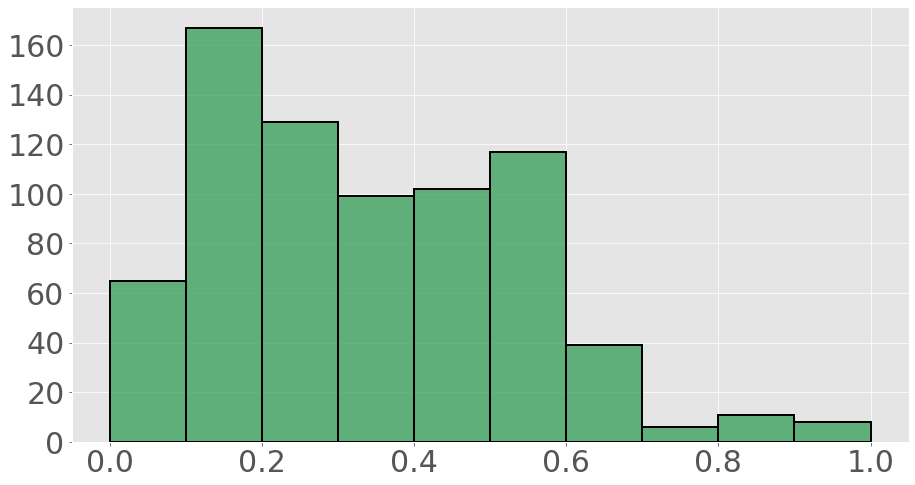

In [42]:
city = 'chi'
if city=='sea': col = '#e7298a'
if city=='chi': col = '#349C55'
if city=='nyc': col = '#FFB318'

if os.path.isfile('data/trust/trust_hwst_%s.csv'%(city)):
    trust_hwst = pd.read_csv('data/trust/trust_hwst_%s.csv'%(city))
else:
    trust_hwst = trustworthiness(highway_with_sidewalk_tag, city)
    trust_hwst.to_csv('data/trust/trust_hwst_%s.csv'%(city), index=False)

plt.style.use('ggplot')
plt.figure(figsize=(15, 8))
plt.xticks(fontsize='30')
plt.yticks(fontsize='30') 

ax = sns.histplot(trust_hwst, x="Trust", color = col, bins = 10, edgecolor='black', linewidth=2)
ax.set(xlabel=None)
ax.set(ylabel=None)

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.savefig("data/plots/Fig5/hwst_%s.pdf"%(city), format="pdf", bbox_inches="tight")

### Trustworthiness of sidewalk and hwst cropped for exact boundary of a city

In [68]:
city = 'sea'
tr = pd.read_csv('data/trust/trust_with_geom_%s.csv'%(city))
trust = gpd.GeoDataFrame(tr, geometry=gpd.GeoSeries.from_wkt(tr["geometry"]), crs="EPSG:4326")
boundaries = gpd.read_file('data/boundaries/%s.geojson'%(city))

# if(city == 'nyc'): trust = trust.cx[-74.04 : -73.85, 40.55 : 40.90]
trust = gpd.sjoin(trust, boundaries, predicate = 'intersects')
trust[['id', 'Trust', 'tags','geometry']].to_csv('data/trust/trust_with_geom_%s_cropped.csv'%(city), index = False)

### Manually check the distribution of trustworthiness index

In [28]:
city = 'sea'
trust_hwst = pd.read_csv('data/trust/trust_hwst_%s.csv'%(city))
(len(trust_hwst[trust_hwst['Trust'] >= 0.5]) / len(trust_hwst) ) * 100

27.68744882442391

### **Geographic plot** of trustworthniess index of sidewalks and highways with sidewalk tag
(Entire city)
(Hexbin Plot Code of Gustavo!!)